<a href="https://colab.research.google.com/github/viish-21/TSV-GRIP-MAY2022-INTERNSHIP-TASK/blob/main/GRIPMAY_TASK1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction using Supervised ML**

## > **By Vishnu Deepak**



## **To Predict the percentage of a student based on the no. of study hours**

Importing the required libraries

In [255]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


Loading the dataset

In [234]:
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df=pd.read_csv(url)

In [235]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [236]:
#no. of  rows and columns in our data
df.shape

(25, 2)

In [237]:
#Summary of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


In [238]:
# As we can see there are no null and duplicate values
print(df.isnull().sum())
print("\n")
print(df.duplicated().sum())

Hours     0
Scores    0
dtype: int64


0


##Data Visualization

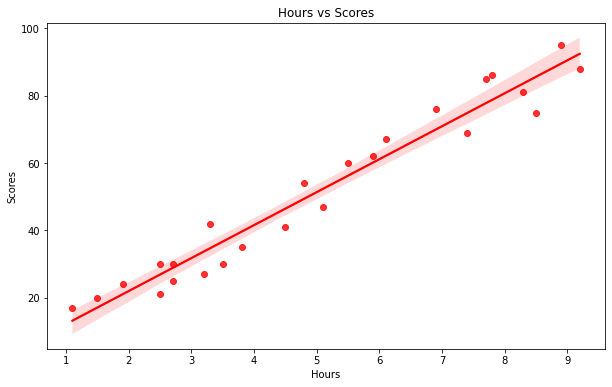

In [239]:
plt.figure(figsize=(10,6))
sns.regplot(x=df.Hours,y=df.Scores,data=df,color='red')
plt.title("Hours vs Scores" )
plt.show()

In [240]:
# There clearly is a positive linear relationship between no. of hours studied and scores 

#Train-Test Split

> We do not have extra data available for testing. So we split the data for training and testng using inbulit functions in the sklearn.model_selection librabry



In [241]:
# x takes every value except the target variable
x= df.iloc[ : , :-1]
# y is our target variable i,e Scores
y= df.iloc[:,-1]

In [242]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,
                                test_size=0.24,random_state=42)

##Training the model

In [243]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

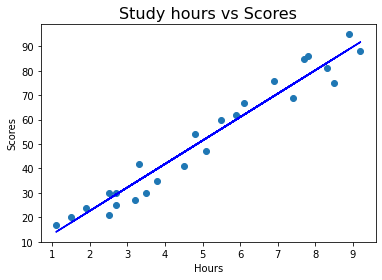

In [244]:
# plotting the regression line
reg_line= reg.coef_*x + reg.intercept_
plt.scatter(x, y)
plt.plot(x, reg_line,color = 'blue');
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Study hours vs Scores', fontsize=16)
plt.show()

In [245]:
# we can see that our regression line is an appropriate fit to the data

In [246]:
 #Predicting the scores
y_pred= reg.predict(x_test)
print(y_pred)

[83.14319853 27.44417111 27.44417111 69.69860571 60.09532512 29.36482723]


In [247]:
# comparing the predicted and actual values
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
new_index= np.arange(0,df1.shape[0])
df1.set_index(new_index,inplace= True)
df1

,Actual,Predicted
0,81,83.143199
1,30,27.444171
2,21,27.444171
3,76,69.698606
4,62,60.095325
5,25,29.364827


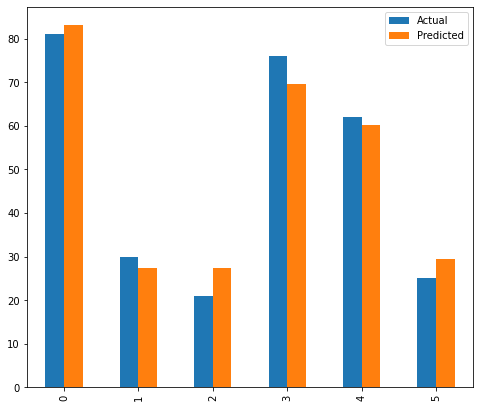

In [248]:

df1.plot(kind='bar',figsize=(8,7))
plt.show()

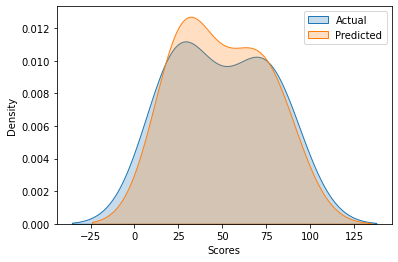

In [249]:
sns.kdeplot(y_test,label='Actual', shade= True)
sns.kdeplot(y_pred,label='Predicted',shade=True)
plt.legend()
plt.show()

In [250]:
# Calculating the training and testing scores of the model
print('Train accuracy: ', reg.score(x_train, y_train),'\nTest accuracy : ', reg.score(x_test,y_test) )

Train accuracy:  0.9475373814076595 
Test accuracy :  0.9684201924053587


In [254]:
# Testing against custom input
hrs= np.array(9.25)
data_pred= reg.predict(hrs.reshape(-1,1))
print("If the student studies for", hrs ,"hours/day, then he/she is likely to score {}%".format(data_pred[0].round(2)))

If the student studies for 9.25 hours/day, then he/she is likely to score 92.27%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


##Evaluating the model

In [252]:
from sklearn import metrics

In [253]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))
print("The R-Square of the model is: ",metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 3.9523491564239777
The R-Square of the model is:  0.9684201924053587


##Conclusion

We used a simple linear regression model to predict the percentage score of a student based on the number of study hours. The predicted score came out to be 92.27% with the model acheiving an accuracy of 96.84%.